In [51]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def complex_multiply(z1, z2):
    a1, b1 = z1
    a2, b2 = z2
    return a1*a2 - b1*b2, a1*b2 + b1*a2

def pow(z, n):
    if n == 0:
        return 1, 0
    if n == 1:
        return z
    if n % 2 == 0:
        return pow(complex_multiply(z, z), n//2)
    else:
        return complex_multiply(z, pow(complex_multiply(z, z), n//2))

def is_near(z1, z2, eps=1e-4):
    a, b = z1
    ra, rb = z2
    return (a - ra)**2 + (b - rb)**2 < eps

# Inputs

In [53]:
# def P(a, b):  # z**2 - 1
#     # return a**2 -b**2 - 1, 2*a*b
#     a_, b_ = pow([a, b], 3)
#     return a_ - 1, b_

# def dP(a, b):  # 2z
#     a_, b_ = pow([a, b], 2)
#     return 3*a_, 3*b_
# roots = [
#     [1, 0],
#     [-0.5, np.sqrt(3)/2],
#     [-0.5, -np.sqrt(3)/2],
# ]

# # colours = [
# #      [255, 0, 0],
# #      [0, 255, 0],
# #      [0, 0, 255],
# # ]


In [54]:
#  z8 + 15z4 − 16
def P(a, b):  # z**2 - 1
    # return a**2 -b**2 - 1, 2*a*b
    a1, b1 = pow([a, b], 8)
    a2, b2 = pow([a, b], 4)
    return a1 + 15*a2 - 16, b1 + 15*b2

def dP(a, b):  # 2z
    a1, b1 = pow([a, b], 7)
    a2, b2 = pow([a, b], 3)
    return 8*a1 + 60*a2, 8*b1 + 60*b2

roots = [
    [1, 0],
    [-1, 0],
    [0, 1],
    [0, -1],
    [np.sqrt(2), np.sqrt(2)],
    [np.sqrt(2), -np.sqrt(2)],
    [-np.sqrt(2), np.sqrt(2)],
    [-np.sqrt(2), -np.sqrt(2)],
]

# colours = [
#      [255, 0, 0],
#      [0, 255, 0],
#      [0, 0, 255],
# ]

# One Iteration

In [55]:
def one_iteration(a, b, P: callable = P, dP: callable = dP):
    Pa, Pb = P(a, b)
    dPa, dPb = dP(a, b)
    den = dPa**2 + dPb**2
    a_ = a - Pa*dPa/den - Pb*dPb/den
    b_ = b - Pb*dPa/den + Pa*dPb/den
    return a_, b_

# Calculations

In [56]:
N = 1000
xy_upper_lim = 1.5
xy_lower_lim = -1.5
a = np.tile(np.linspace(xy_lower_lim, xy_upper_lim, N).tolist(), (N, 1))
b = np.tile(np.linspace(xy_lower_lim, xy_upper_lim, N).tolist(), (N, 1)).T

In [57]:
for i in tqdm(range(30)):
    a, b = one_iteration(a, b)

100%|██████████| 30/30 [00:36<00:00,  1.22s/it]


# Results

In [58]:
s = np.zeros([N, N, 1], dtype=np.uint8)
colours = (np.linspace(1, 16, len(roots)+1, dtype=np.uint8)[1:])**2-1
for i in range(len(roots)):
    s[is_near([a, b], roots[i])] = colours[i]

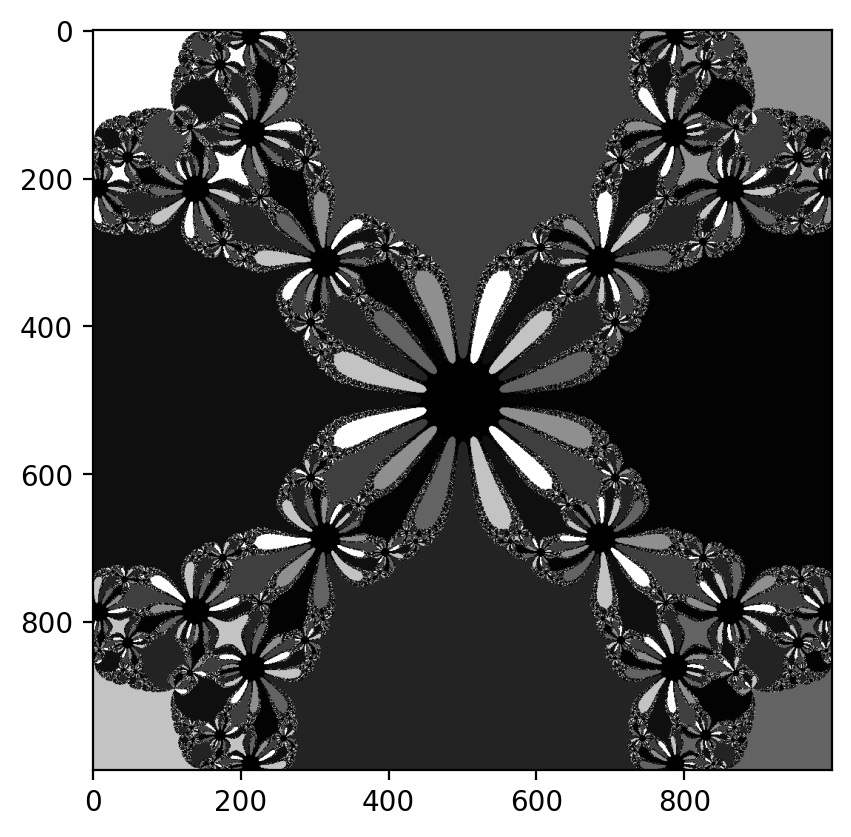

In [59]:
plt.figure(dpi = 200)
plt.imshow(s, cmap='gray')